# Visualization for Delegation Based Lock

In [8]:
@time using DataFrames, CSV, StatsPlots

bench = @time CSV.read("output/output.csv", DataFrame)


  0.000293 seconds (459 allocations: 43.969 KiB)


  0.816361 seconds (432.24 k allocations: 29.518 MiB, 99.86% compilation time: 100% of which was recompilation)


Row,Id,CpuId,ThreadNum,CpuNum,LoopCount,NumAcquire,HoldTime,CombineTime,Locktype
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64?,String
1,0,0,2,64,188249980,241568,2427,11909834261,Flat Combining (SkipList)
2,1,1,2,64,560650824,239678,7201,11408599747,Flat Combining (SkipList)
3,0,0,2,64,187080540,241013,2421,23432778084,Flat Combining
4,1,1,2,64,564896798,241008,7241,missing,Flat Combining
5,0,0,2,64,375895724,482121,4843,15358501040,Flat Combining Fair
6,1,1,2,64,284911092,121744,3658,5975068967,Flat Combining Fair
7,0,0,2,64,347862905,478939,4812,10465058022,Flat Combining Fair With Combiner Slice
8,1,1,2,64,266062361,120988,3635,10020714052,Flat Combining Fair With Combiner Slice
9,0,0,2,64,667336277,928140,9323,missing,Mutex


  0.194562 seconds (367.07 k allocations: 19.154 MiB, 97.53% compilation time)


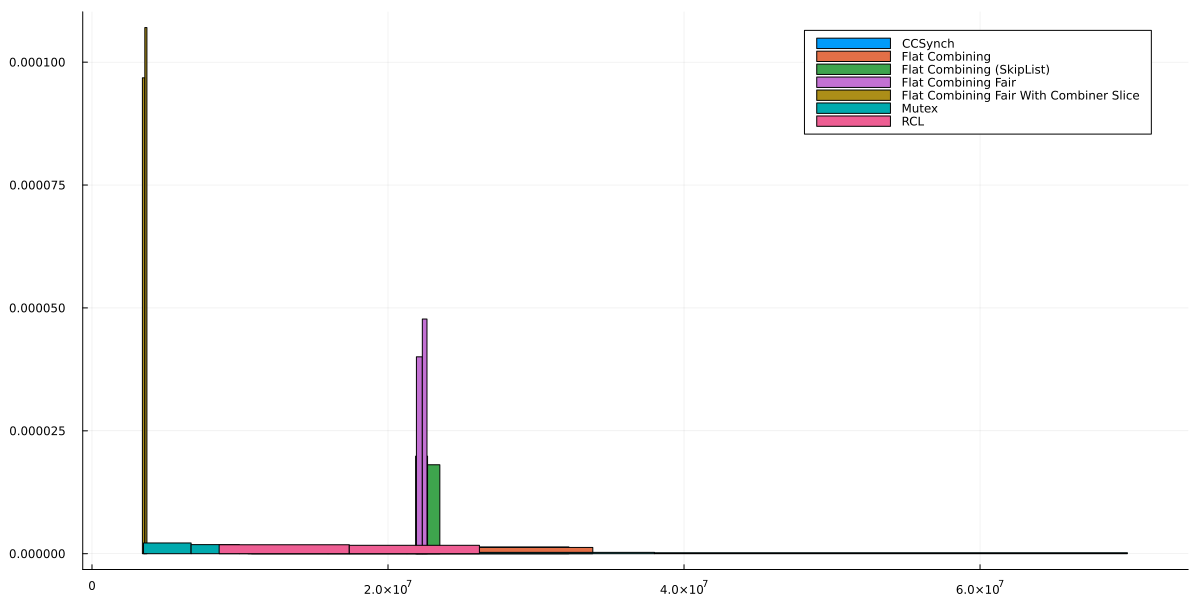

In [51]:
using StatsPlots, Query

loop_comparison = @time begin
    bench |>
        @filter(_.ThreadNum == 32) |>
        @df ea_histogram(:LoopCount, group=:Locktype, size=(1200,600))
end
    
savefig(loop_comparison, "graphs/loop_comparison.svg")
loop_comparison

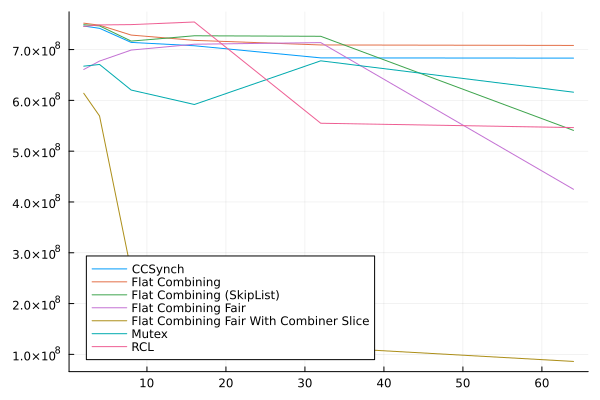

In [12]:
using Query, StatsPlots

bench2 = bench |>
    @groupby((_.ThreadNum, _.Locktype)) |>
    @map({ThreadNum = key(_)[1], Locktype = key(_)[2], LoopCount = sum(_.LoopCount)}) |>
    DataFrame


@df bench2 plot(:ThreadNum, :LoopCount, group=:Locktype)

  0.015055 seconds (6.90 k allocations: 442.773 KiB, 98.78% compilation time)


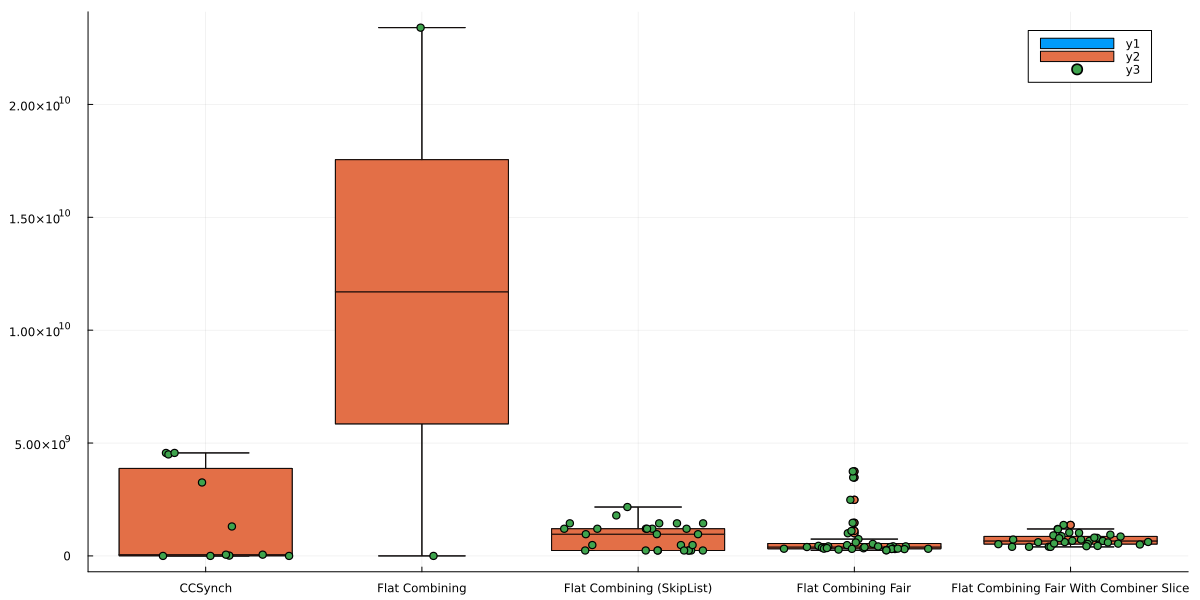

In [46]:
using DataFrames

bench_32thread = @time dropmissing(bench) |>
    @filter(_.ThreadNum == 32)

combiner_time_comparison = @df bench_32thread boxplot(:Locktype, :CombineTime, size=(1200,600))
@df bench_32thread boxplot!(:Locktype, :CombineTime)
@df bench_32thread dotplot!(:Locktype, :CombineTime)


    
savefig("graphs/combiner_time_comparison.svg")
combiner_time_comparison
